In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv(
    "https://www.ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt",
    delim_whitespace=True,
    skiprows=1,
    names=['Year', 'Month', 'Day', 'SSN']
)

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['Day'] = pd.to_numeric(df['Day'], errors='coerce')
df['SSN'] = pd.to_numeric(df['SSN'], errors='coerce')

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')

df_filt = df[df['Date'] <= '2012-01-01']

print(df_filt)

         Year  Month   Day   SSN       Date
1      1945.0    1.0   1.0  10.0 1945-01-01
2      1945.0    1.0   2.0   0.0 1945-01-02
3      1945.0    1.0   3.0   1.0 1945-01-03
4      1945.0    1.0   4.0   2.0 1945-01-04
5      1945.0    1.0   5.0  11.0 1945-01-05
...       ...    ...   ...   ...        ...
24468  2011.0   12.0  28.0  62.0 2011-12-28
24469  2011.0   12.0  29.0  67.0 2011-12-29
24470  2011.0   12.0  30.0  58.0 2011-12-30
24471  2011.0   12.0  31.0  55.0 2011-12-31
24472  2012.0    1.0   1.0  39.0 2012-01-01

[24472 rows x 5 columns]


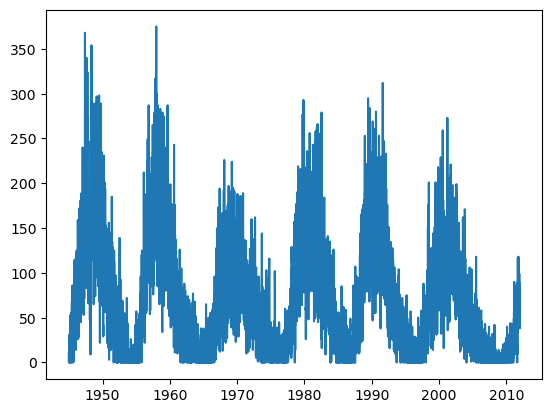

In [160]:
plt.plot(df_filt['Date'],df_filt['SSN'])
plt.show()

# 1.1

In [161]:
df = pd.to_numeric(df_filt['SSN'], errors='coerce')
y1 = df.to_numpy()
y = y1 - y1.mean()
TF=np.fft.fft(y)
print(TF)
fs=np.fft.fftfreq(len(df))

[-1.76441972e-10     +0.j         -2.34448213e+04 -30873.95771451j
 -3.26963367e+04-232426.57947283j ... -7.48830746e+04 +71882.43955851j
 -3.26963367e+04+232426.57947283j -2.34448213e+04 +30873.95771451j]


In [162]:
TFabs= abs(TF)
print(TFabs)

[1.76441972e-10 3.87667501e+04 2.34715073e+05 ... 1.03800578e+05
 2.34715073e+05 3.87667501e+04]


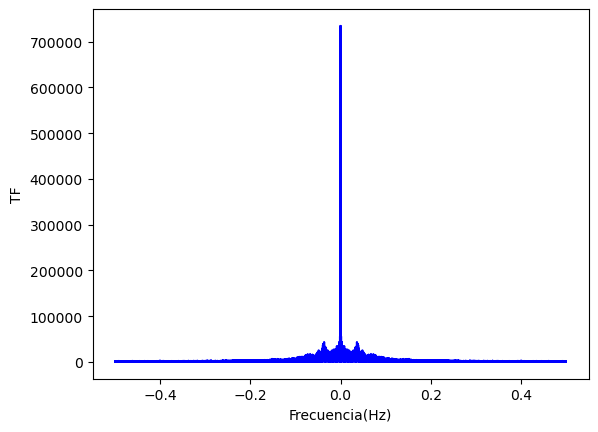

In [163]:
N = len(TFabs)
t= np.linspace(0,N,N)

plt.plot(fs,TFabs, color ='blue')
plt.xlabel('Frecuencia(Hz)')
plt.ylabel('TF')
plt.show()

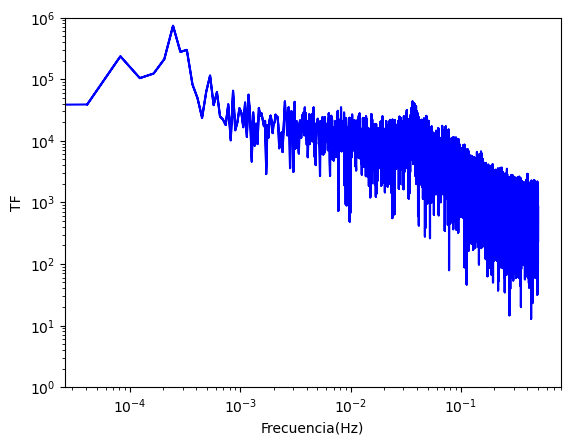

In [164]:
plt.plot(abs(fs),TFabs, color ='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frecuencia(Hz)')
plt.ylabel('TF')
plt.ylim(1e0,1e6)
plt.show()

In [165]:
def filtro(f,a):
    filt = np.exp(-(f*a)**2)
    return filt



In [166]:
TF_filt= filtro(fs,2000)*TF
print (TF_filt)

[-1.76441972e-10     +0.j         -2.32887517e+04 -30668.43311193j
 -3.18343677e+04-226299.14991003j ... -7.05143024e+04 +67688.72815939j
 -3.18343677e+04+226299.14991003j -2.32887517e+04 +30668.43311193j]


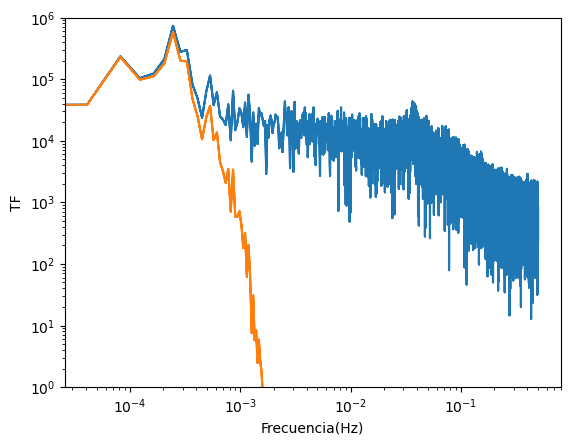

In [167]:
N = len(TFabs)
t= np.linspace(0,N,N)
plt.plot(abs(fs),abs(TF))
plt.plot(abs(fs),abs(TF_filt))
#plt.plot(fs,TFabs, color ='blue')
plt.ylim(1e0,1e6)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frecuencia(Hz)')
plt.ylabel('TF')
plt.show()

In [168]:
TF_inv=np.fft.ifft(TF_filt).real + df.mean()
print(TF_inv)

[50.39686268 50.46757391 50.53837402 ... 50.18526115 50.25570643
 50.32624023]


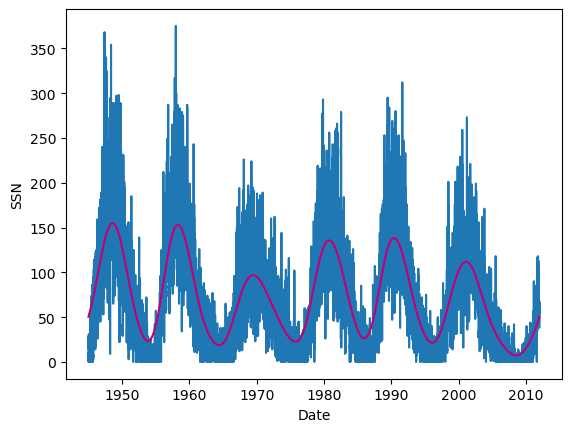

In [169]:
N = len(TFabs)
t= np.linspace(0,N,N)

plt.figure()



plt.plot(df_filt['Date'],df_filt['SSN'])
plt.plot(df_filt['Date'],TF_inv, color ='#C20078')
plt.xlabel('Date')
plt.ylabel('SSN')


plt.show()

In [170]:
TF_fsn=np.concatenate([TF[:10],TF[-10:]])

In [171]:
fs_ni= fs[:10]
fs_nf=fs[-10:]
fs_n = np.concatenate((fs_ni,fs_nf))
print(fs_n)

[ 0.00000000e+00  4.08630271e-05  8.17260543e-05  1.22589081e-04
  1.63452109e-04  2.04315136e-04  2.45178163e-04  2.86041190e-04
  3.26904217e-04  3.67767244e-04 -4.08630271e-04 -3.67767244e-04
 -3.26904217e-04 -2.86041190e-04 -2.45178163e-04 -2.04315136e-04
 -1.63452109e-04 -1.22589081e-04 -8.17260543e-05 -4.08630271e-05]


In [172]:
#extrapolar la señal
t_array = pd.date_range(start='1945-01-01', end='2030-01-01', freq='D')
print(t_array)

DatetimeIndex(['1945-01-01', '1945-01-02', '1945-01-03', '1945-01-04',
               '1945-01-05', '1945-01-06', '1945-01-07', '1945-01-08',
               '1945-01-09', '1945-01-10',
               ...
               '2029-12-23', '2029-12-24', '2029-12-25', '2029-12-26',
               '2029-12-27', '2029-12-28', '2029-12-29', '2029-12-30',
               '2029-12-31', '2030-01-01'],
              dtype='datetime64[ns]', length=31047, freq='D')


In [173]:
num_d= len(t_array)
print(num_d)

31047


In [174]:
def IFT(F,f,t,N):
    d =0
    for i in range(len(f)):
        c=F[i]*np.exp(2*np.pi*1j*f[i]*t)
        d += c

    return d/N

In [175]:
N = num_d
t_range = np.arange(0,N)
extr=[IFT(TF_fsn,fs_n,t,N).real + df.mean() for  t in t_range]

print(extr)

[48.82698380417219, 48.899373158660424, 48.97185529861288, 49.044430154908184, 49.117097657970604, 49.18985773776975, 49.262710323820535, 49.33565534518297, 49.40869273046199, 49.48182240780735, 49.55504430491347, 49.62835834901922, 49.70176446690789, 49.77526258490694, 49.84885262888794, 49.92253452426638, 49.99630819600155, 50.07017356859642, 50.1441305660975, 50.21817911209472, 50.29231912972124, 50.36655054165345, 50.44087327011072, 50.515287236855364, 50.58979236319248, 50.664388569969844, 50.73907577757782, 50.81385390594919, 50.88872287455911, 50.96368260242495, 51.03873300810625, 51.113874009704546, 51.1891055248633, 51.26442747076783, 51.33983976414517, 51.415342321264, 51.490935057934536, 51.566617889508464, 51.642390730878844, 51.71825349648002, 51.79420610028751, 51.870248455818, 51.946380476129164, 52.02260207381968, 52.0989131610291, 52.175313649437825, 52.25180345026696, 52.3283824742783, 52.40505063177431, 52.48180783259792, 52.558653986132626, 52.635589001302314, 52.71

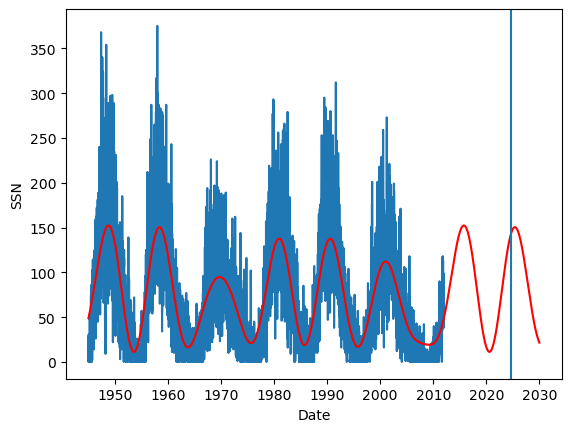

In [176]:
plt.plot(df_filt['Date'],df_filt['SSN'])
plt.plot(t_array,extr,"r")
plt.xlabel('Date')
plt.ylabel('SSN')


plt.axvline(pd.to_datetime("2024-08-20"))

In [177]:
n_days = (pd.to_datetime("2024-08-20") - t_array[0]).days

In [178]:
#Cantidad de manchas solares a mitad de Agosto de 2024
extr[n_days]

142.5884239787248

Como se puede ver en la imagen de la extrapolación, en 2024 nos encontramos acercándonos a un máximo del ciclo solar.
A mitad de Agosto de 2024 ses espera tener aproximadamente 142 manchas solares.
Al comparar las predicciones obtenidas con la información brindada vemos que los datos son similares, la extrapolación realizada es coherente con la predicción mostrada en la página web consultada.

# 2

In [197]:
from PIL import Image

In [198]:
img = np.array(Image.open("C:/Users/Angelica/Downloads/image.jpg")).astype(float)
print(img)

[[241. 247. 251. ... 224. 217. 216.]
 [249. 253. 255. ... 238. 234. 233.]
 [255. 255. 255. ... 249. 248. 248.]
 ...
 [106. 125. 133. ... 106. 101. 103.]
 [124. 143. 151. ... 124. 121. 124.]
 [147. 159. 160. ... 140. 139. 143.]]


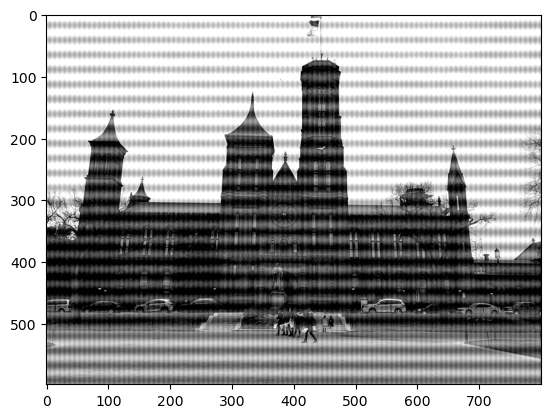

In [199]:
plt.imshow(img,cmap='gray')

In [200]:
TF2=np.fft.fft2(img)
TF2=np.fft.fftshift(TF2)
f_img,c_img =TF2.shape


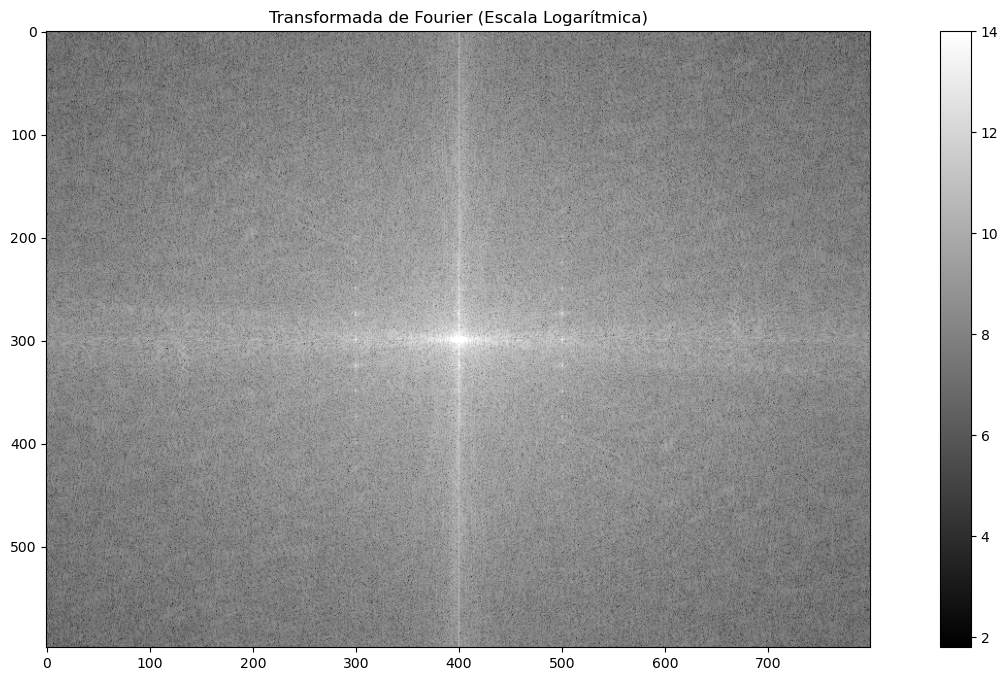

In [201]:
from skimage import io, color

mag_TF2= np.log(1 + abs(TF2))

plt.figure(figsize=(18, 8))
plt.title('Transformada de Fourier (Escala Logarítmica)')
plt.imshow(mag_TF2, cmap='gray',vmax=14)
plt.colorbar()

plt.show()

In [202]:
ITF2_sinfilt = abs(np.fft.ifft2((TF2)))
print(ITF2_sinfilt)

[[241. 247. 251. ... 224. 217. 216.]
 [249. 253. 255. ... 238. 234. 233.]
 [255. 255. 255. ... 249. 248. 248.]
 ...
 [106. 125. 133. ... 106. 101. 103.]
 [124. 143. 151. ... 124. 121. 124.]
 [147. 159. 160. ... 140. 139. 143.]]


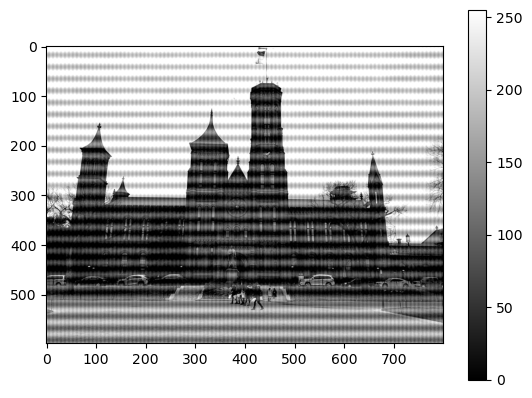

In [203]:
plt.imshow(ITF2_sinfilt,cmap='gray')
plt.colorbar()

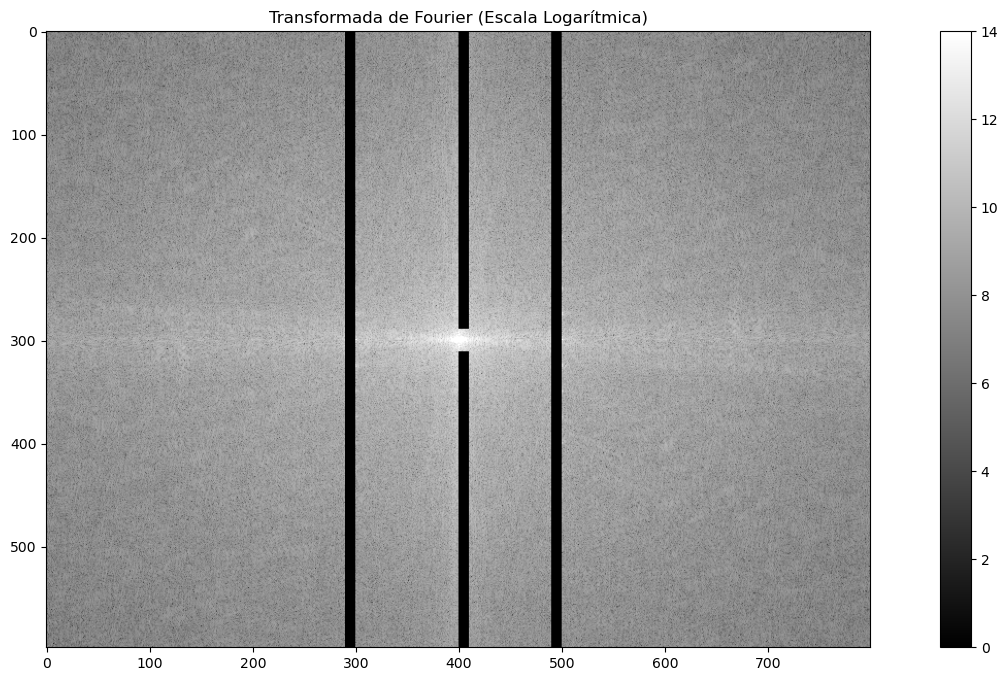

In [206]:
for i in range(f_img):
    for j in range(c_img):
        if i == 290:
            TF2[j:j+10,i:i+10] = 0.
        if i == 490:
            TF2[j:j+10,i:i+10] = 0.          
        if j >310 and i == 400 or j < 280 and i == 400:
            TF2[j:j+10,i:i+10] = 0.
            
plt.figure(figsize=(18, 8))
plt.title('Transformada de Fourier (Escala Logarítmica)')
plt.imshow(np.log(1 + abs(TF2)), cmap='gray',vmax=14)
plt.colorbar()

plt.show()

In [207]:
ITF2 = abs(np.fft.ifft2(np.fft.ifftshift(TF2)))
print(ITF2)

[[191.60363471 196.37621855 199.79452683 ... 175.1681696  168.89437162
  167.66726749]
 [191.40046625 193.47946558 194.64364332 ... 181.84161364 178.88003159
  177.25654576]
 [194.49299487 193.67142072 193.19346029 ... 188.58050991 188.25338528
  188.17792177]
 ...
 [170.90568801 190.04855368 198.24514694 ... 170.96519707 165.84796422
  167.82875134]
 [177.13044557 196.27212993 204.37373023 ... 176.39138845 173.59700181
  176.88589572]
 [189.80758508 201.55347398 202.60116114 ... 182.33115133 181.82048879
  185.98540839]]


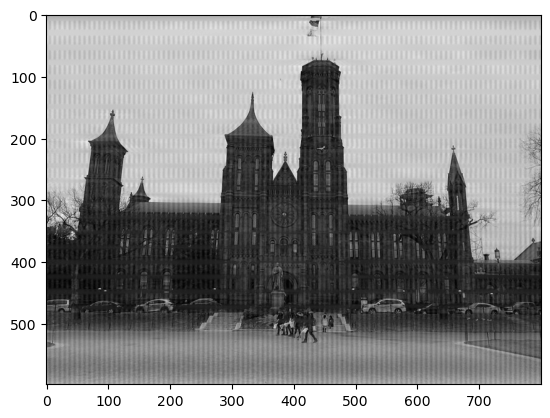

In [208]:
plt.imshow(ITF2,cmap='gray')